In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data =pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [10]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [11]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [12]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [13]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [14]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [15]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

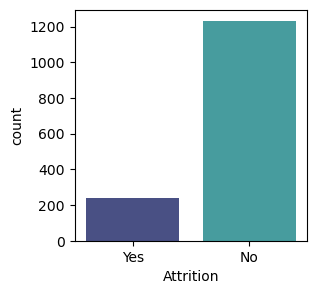

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(data['Attrition'] ,palette="mako")
plt.show()

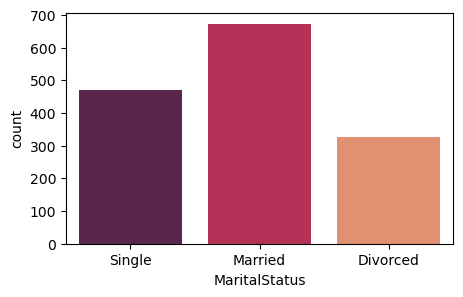

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data['MaritalStatus'],palette="rocket")
plt.show()

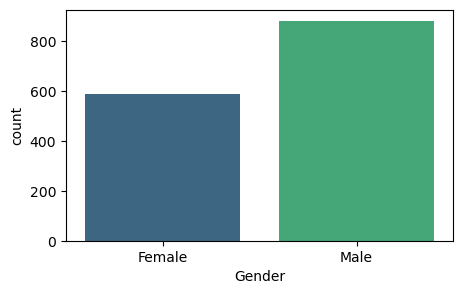

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(data['Gender'],palette="viridis")
plt.show()

In [19]:
data.replace({'Attrition':{'No':0,'Yes':1},'BusinessTravel':{'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2},'Department':{'Research & Development':0,'Sales':1,'Human Resources':2},'Gender':{'Male':0,'Female':1},'MaritalStatus':{"Married":0,"Single":1,'Divorced':2},
                      'Over18':{'Y':0},'OverTime':{'No':0,'Yes':1}},inplace =True)

In [20]:
le =LabelEncoder()
data["EducationField"]=le.fit_transform(data["EducationField"])
data["JobRole"]=le.fit_transform(data["JobRole"])

In [21]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


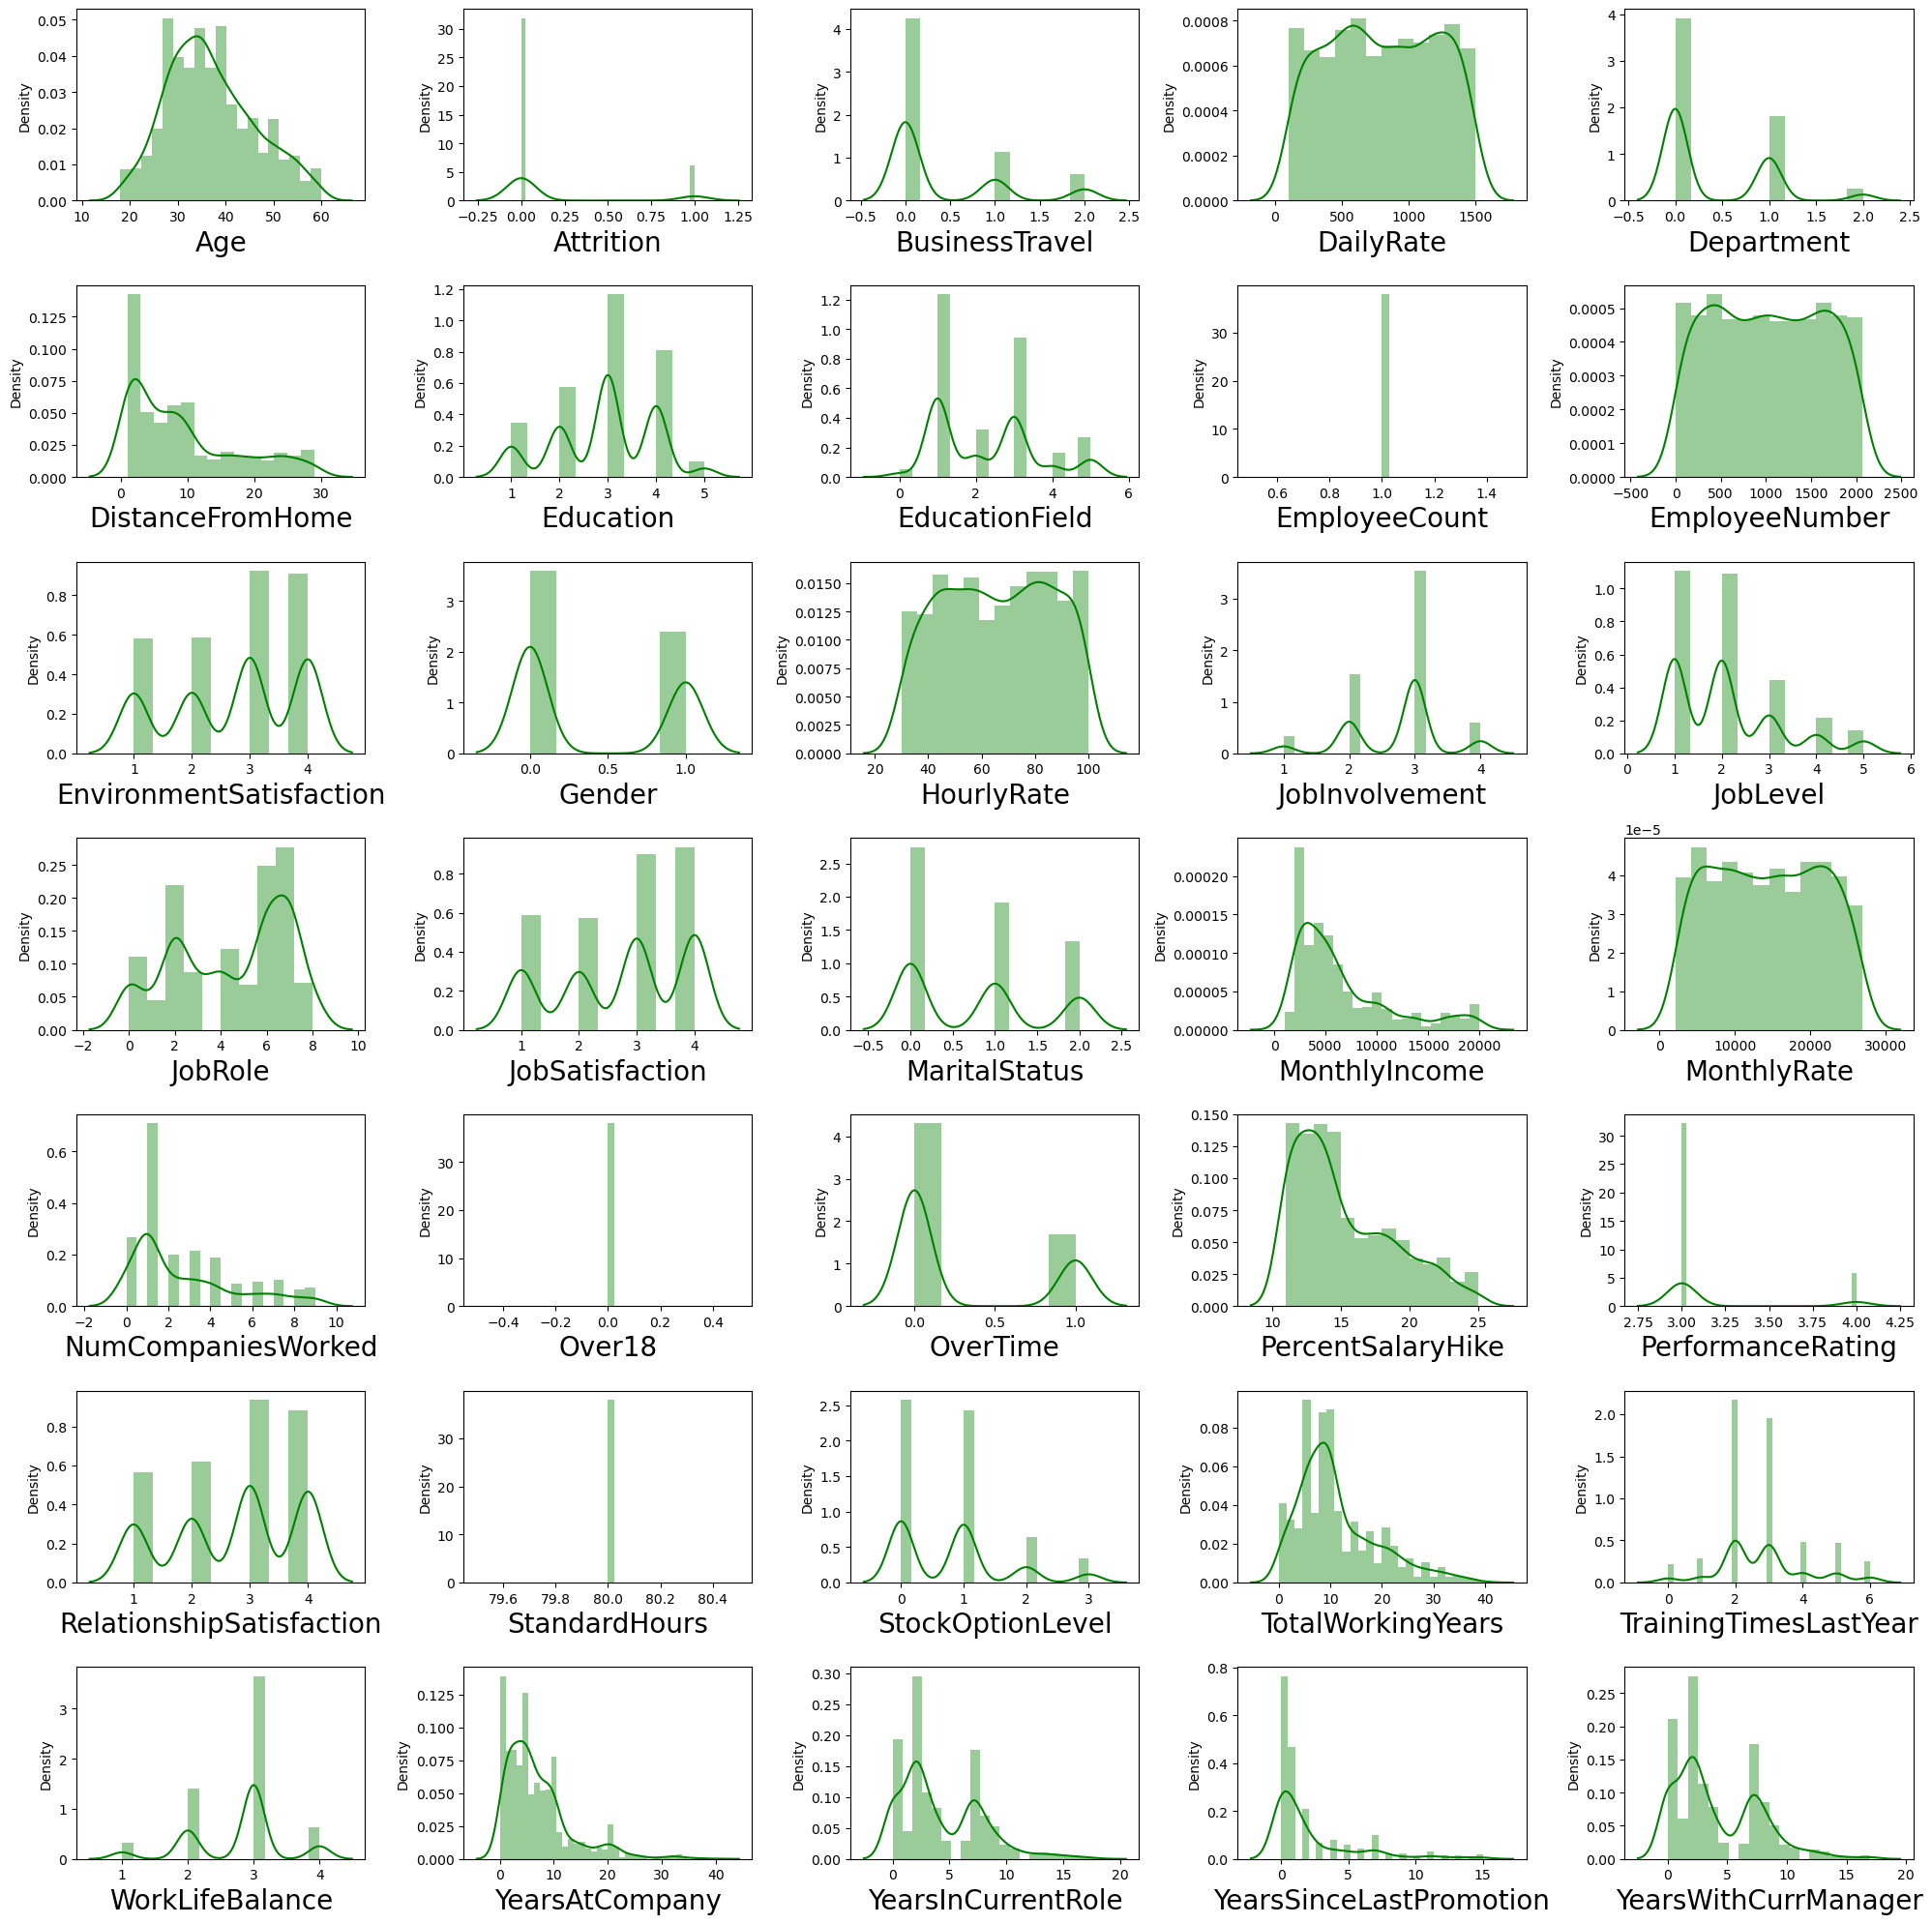

In [22]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data[column], color='g')
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

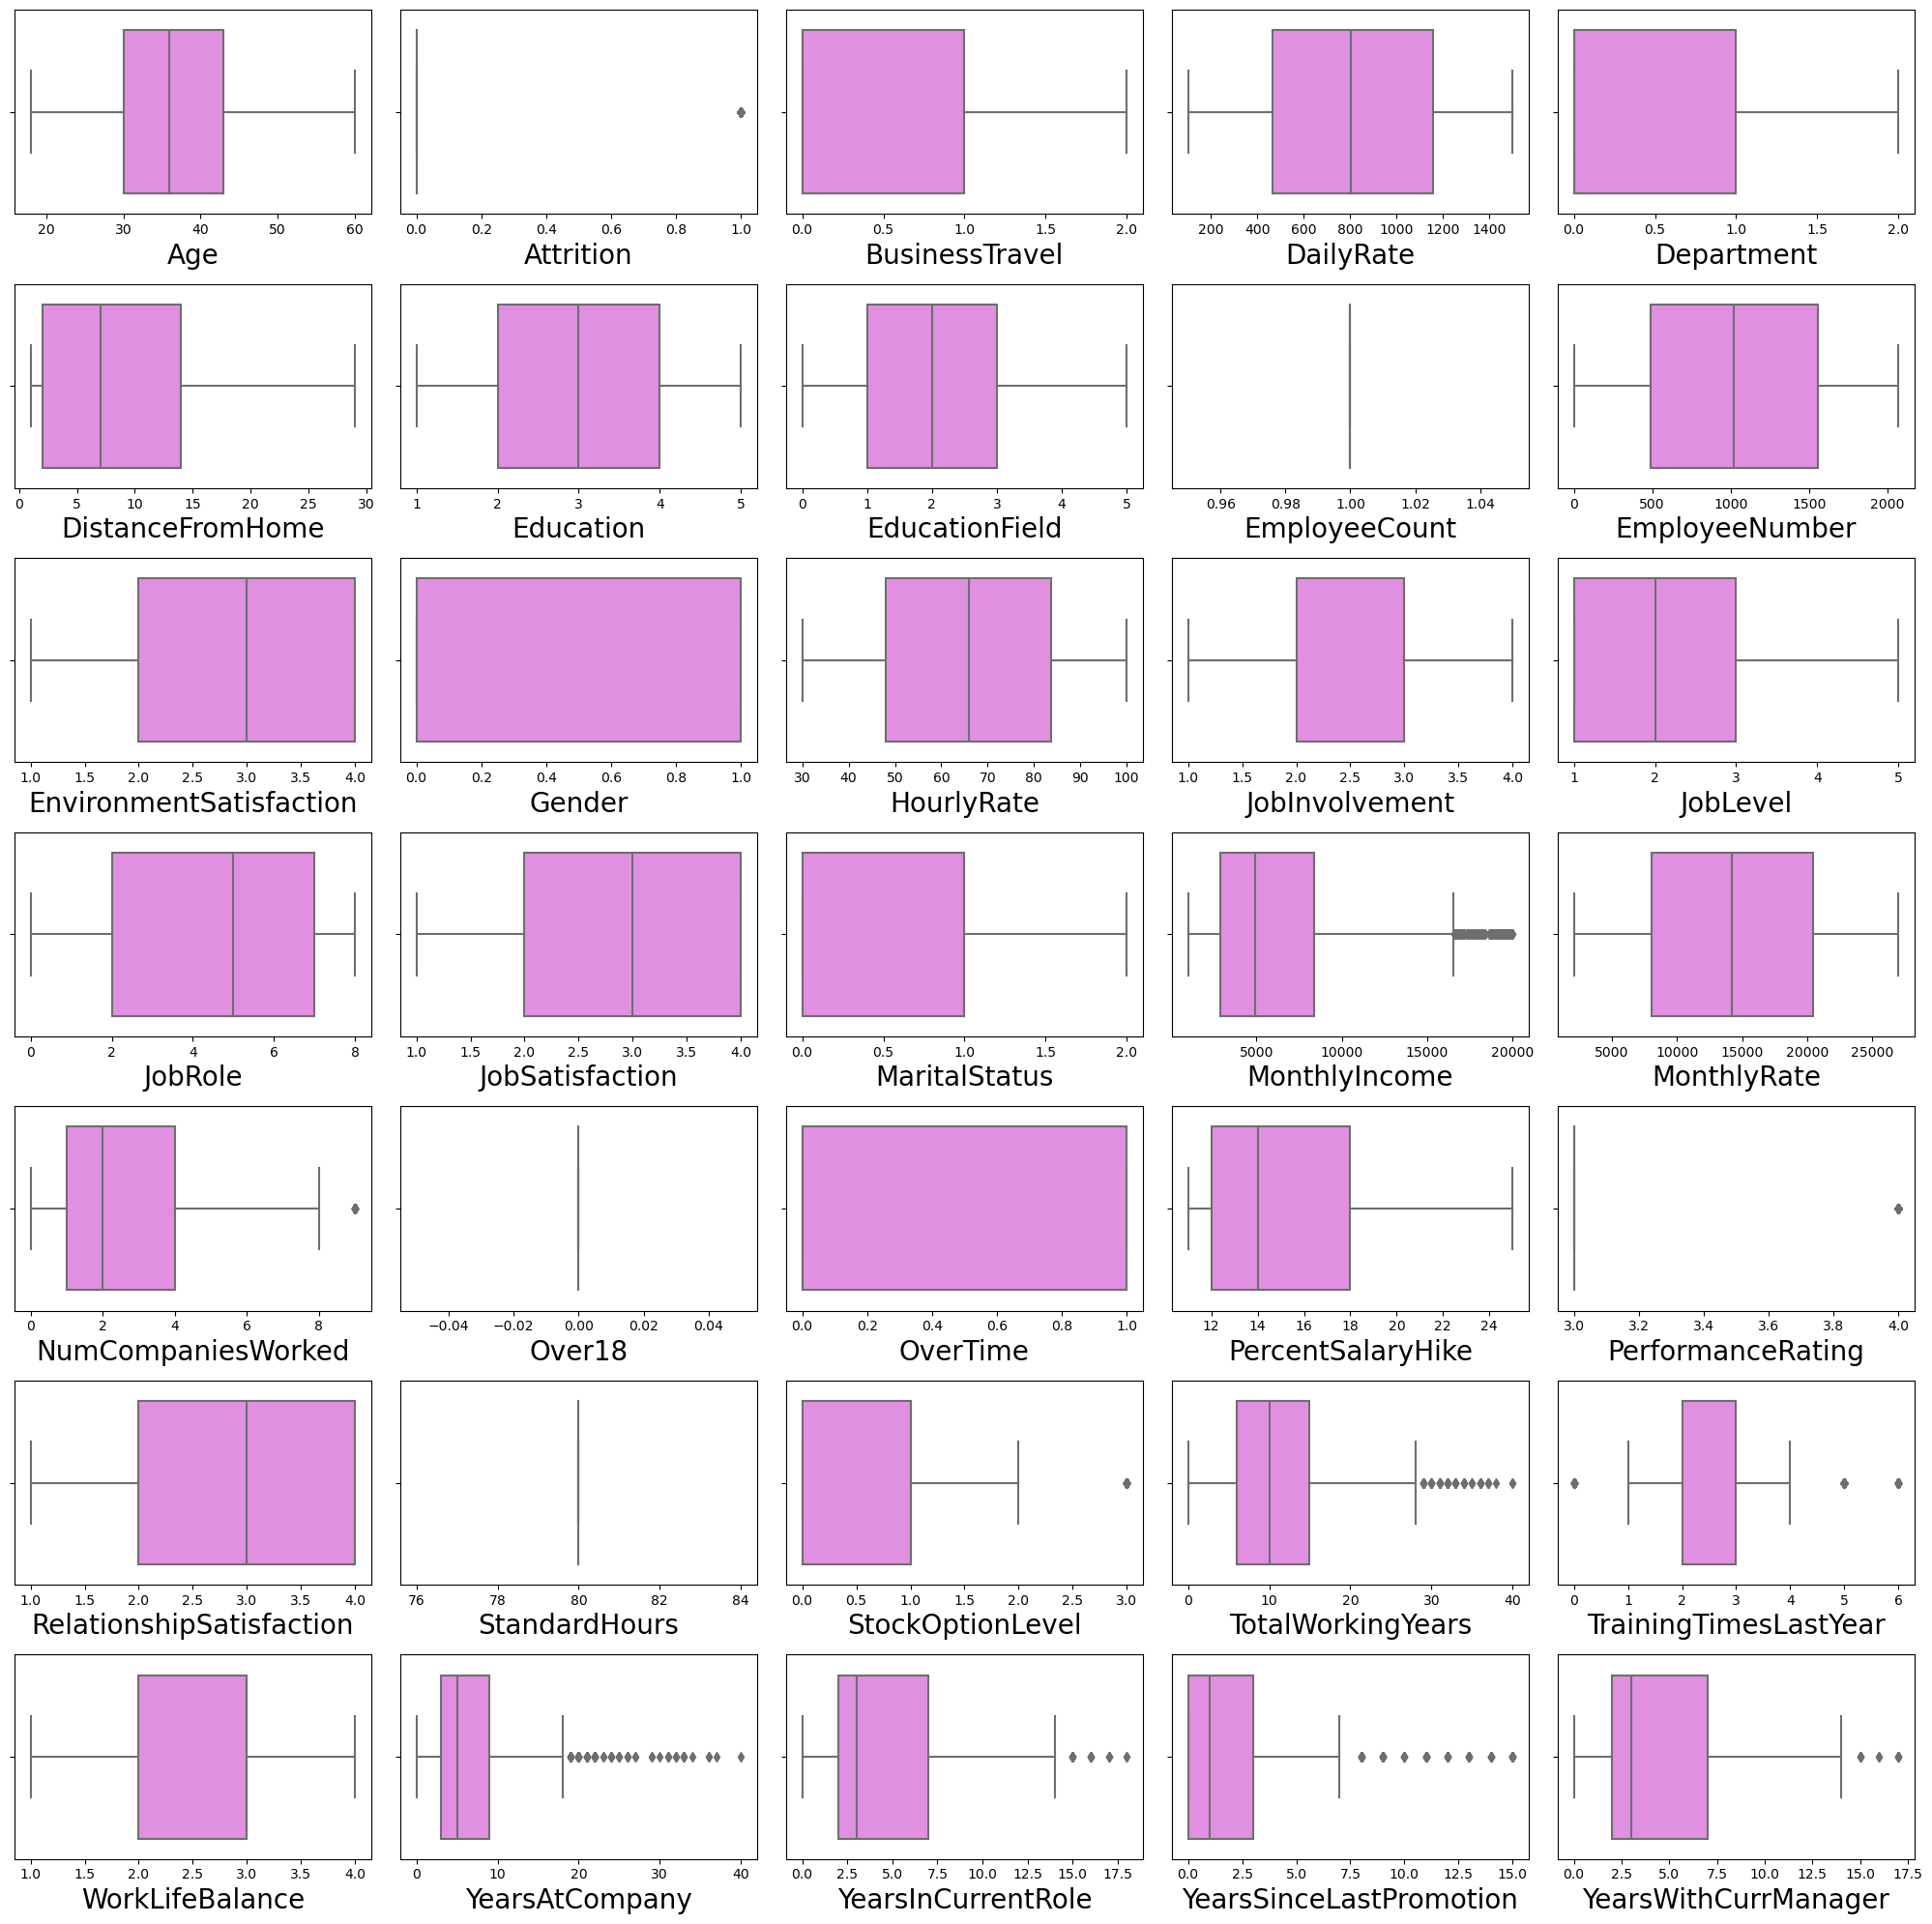

In [23]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(data[column], color='violet')
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [48]:
x =data.drop(['Attrition'], axis =1)
y =data['Attrition']

In [49]:
x.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
BusinessTravel              1.439006
MonthlyIncome               1.369817
Department                  1.141828
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
MaritalStatus               0.443615
Age                         0.413286
Gender                      0.408665
MonthlyRate                 0.018578
EmployeeNumber              0.016574
Over18                      0.000000
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
E

In [51]:
best_features =SelectKBest(score_func=f_classif, k=15)
fit =best_features.fit(x,y)

In [52]:
data_scores =pd.DataFrame(fit.scores_)
data_columns =pd.DataFrame(x.columns)

In [53]:
feature_scores =pd.concat([data_columns,data_scores], axis=1)
feature_scores.columns =['Feature_Name','Score']
print(feature_scores.nlargest(15,'Score'))

               Feature_Name      Score
21                 OverTime  94.656457
27        TotalWorkingYears  71.027013
13                 JobLevel  58.394595
30           YearsAtCompany  57.045848
33     YearsWithCurrManager  50.840644
31       YearsInCurrentRole  50.819757
0                       Age  46.797439
26         StockOptionLevel  46.033047
12           JobInvolvement  23.327188
15          JobSatisfaction  15.815499
9   EnvironmentSatisfaction  14.898563
3                Department  10.624078
4          DistanceFromHome   9.035418
14                  JobRole   6.833510
28    TrainingTimesLastYear   5.534265


In [54]:
new_x =data[['OverTime','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement',
            'JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','Department','JobRole']]

In [55]:
scalar = StandardScaler()
x_scalar = scalar.fit_transform(new_x)

In [56]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(x_scalar,y ,test_size= 0.25, random_state =i)
    rfc =RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred =rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.8342391304347826 random state 1
accuracy 0.8342391304347826 random state 1
accuracy 0.8559782608695652 random state 2
accuracy 0.8559782608695652 random state 2
accuracy 0.8586956521739131 random state 3
accuracy 0.8586956521739131 random state 3
accuracy 0.8614130434782609 random state 4
accuracy 0.8614130434782609 random state 4
accuracy 0.8478260869565217 random state 5
accuracy 0.8641304347826086 random state 6
accuracy 0.8641304347826086 random state 6
accuracy 0.8532608695652174 random state 7
accuracy 0.8505434782608695 random state 8
accuracy 0.8559782608695652 random state 9
accuracy 0.8342391304347826 random state 10
accuracy 0.8559782608695652 random state 11
accuracy 0.8478260869565217 random state 12
accuracy 0.8559782608695652 random state 13
accuracy 0.8668478260869565 random state 14
accuracy 0.8668478260869565 random state 14
accuracy 0.8641304347826086 random state 15
accuracy 0.842391304347826 random state 16
accuracy 0.8342391304347826 random state 17
acc

In [57]:
x_train,x_test,y_train,y_test =train_test_split(x_scalar,y ,test_size= 0.25, random_state =123)

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [62]:
print(" The number of classes before fit :",format(Counter(y_train)))
print(" The number of classes after fit  :",format(Counter(y_train_res)))

 The number of classes before fit : Counter({0: 913, 1: 189})
 The number of classes after fit  : Counter({0: 913, 1: 913})


In [63]:
lr =LogisticRegression()
lr.fit(x_train_res,y_train_res)
y_pred =lr.predict(x_test)

In [64]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.7418478260869565

 confusion matrix 
 [[236  84]
 [ 11  37]]

 report :               precision    recall  f1-score   support

           0       0.96      0.74      0.83       320
           1       0.31      0.77      0.44        48

    accuracy                           0.74       368
   macro avg       0.63      0.75      0.64       368
weighted avg       0.87      0.74      0.78       368



In [65]:
scr = cross_val_score(lr,x_scalar,y, cv=10)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8571428571428571


In [66]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train_res,y_train_res)
y_pred =knn.predict(x_test)

In [67]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.6902173913043478

 confusion matrix 
 [[225  95]
 [ 19  29]]

 report :               precision    recall  f1-score   support

           0       0.92      0.70      0.80       320
           1       0.23      0.60      0.34        48

    accuracy                           0.69       368
   macro avg       0.58      0.65      0.57       368
weighted avg       0.83      0.69      0.74       368



In [41]:
scr = cross_val_score(knn,x_scalar,y, cv=10)
print("Cross Validation score",scr.mean())

Cross Validation score 0.846938775510204


In [42]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train_res,y_train_res)
y_pred =rf.predict(x_test)

In [43]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8722826086956522

 confusion matrix 
 [[302  18]
 [ 29  19]]

 report :               precision    recall  f1-score   support

           0       0.91      0.94      0.93       320
           1       0.51      0.40      0.45        48

    accuracy                           0.87       368
   macro avg       0.71      0.67      0.69       368
weighted avg       0.86      0.87      0.87       368



In [44]:
scr = cross_val_score(rf,x_scalar,y, cv=10)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8523809523809524


In [45]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train_res,y_train_res)
y_pred =dtc.predict(x_test)

In [46]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8097826086956522

 confusion matrix 
 [[275  45]
 [ 25  23]]

 report :               precision    recall  f1-score   support

           0       0.92      0.86      0.89       320
           1       0.34      0.48      0.40        48

    accuracy                           0.81       368
   macro avg       0.63      0.67      0.64       368
weighted avg       0.84      0.81      0.82       368



In [47]:
scr = cross_val_score(dtc,x_scalar,y, cv=10)
print("Cross Validation score",scr.mean())

Cross Validation score 0.7891156462585034


# Hyperparameter tuning

In [68]:
rfc = RandomForestClassifier()

In [90]:
params ={'n_estimators':[10,15],
         'criterion':['entropy','gini'],
         'max_depth':[8,15],
          'min_samples_split':[2,15],
           'min_samples_leaf':[2,15]}

In [91]:
grd =GridSearchCV(rfc,param_grid=params)

In [92]:
grd.fit(x_train,y_train)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 15}


In [93]:
rfc =grd.best_estimator_ 

In [94]:
rfc.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=15)

In [95]:
y_pred =rfc.predict(x_test)

print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8641304347826086

 confusion matrix 
 [[292  28]
 [ 22  26]]

 report :               precision    recall  f1-score   support

           0       0.93      0.91      0.92       320
           1       0.48      0.54      0.51        48

    accuracy                           0.86       368
   macro avg       0.71      0.73      0.72       368
weighted avg       0.87      0.86      0.87       368



In [96]:
scr = cross_val_score(rfc,x_scalar,y, cv=10)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8510204081632653


## Training

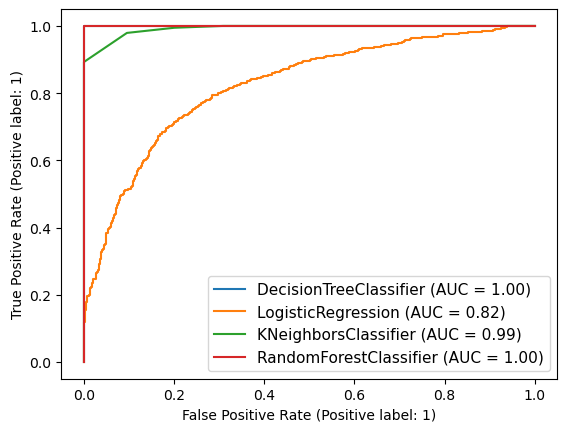

In [97]:
disp =plot_roc_curve(dtc,x_train_res,y_train_res)

plot_roc_curve(lr,x_train_res,y_train_res,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(rf,x_train_res,y_train_res,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()

## Testing

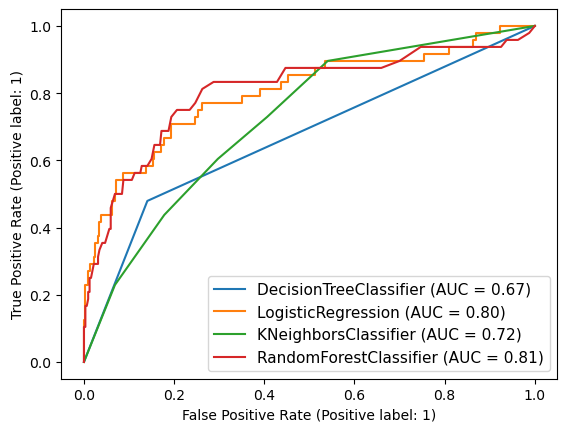

In [98]:
disp =plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()